## Tutorial 1: Sets and functions

Different topics:
* Check membership set, working with restrictions - make selections
* polar coordinates, inverse functions
* load dataset
* Graphically represent functions

In [1]:
import numpy as np
import math
import random

In this exercise we will use data of a dart player to calculate the average score.
We will use the following dartboard:

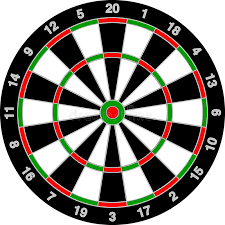

For those who are not familiar with the game of darts, here is a short description. A player throws a dart at the board. Depending on where the dart lands, there is a score. 

* The red center called Bull is worth 50 points
* The green area around the Bull is worth 25 points
* The scores in the other circle parts depend on the number at the border. The outer red-green ring leads to double score, that is, two times the number. The inner red-green circle leads to a triple score, i.e., three times the number. 
* Outside the 'doubles' ring the score is 0

Note that the highest score for a single dart is to throw in the triple area corresponding to field 20. 
In this exercise you will use a data set with landing positions $x=(x_0,x_1)\in \mathbb{R}^2$ of the dart. Calculate the average score per dart thrown. 

In order to do so, of course we need more details about the dimensions defining the dart board. See the pricture below. The unit of choice is mm. You may assume that the circle parts are all equally large, so the 20 parts relate to an angle of $\frac{1}{10}\pi$.

* Bulls eye is defined by the circle with radius 6.5mm
* The green part including the bulls eye has radius 16mm. 
* The first 'triple ring' consists of all points that are more than 97mm and less than 107mm away from the center. 
* The boundary 'double ring' consists of all points that are more than 160mm and less than 170mm away from the center. 
* Positions at distance larger than 170mm from the center lead to score 0.

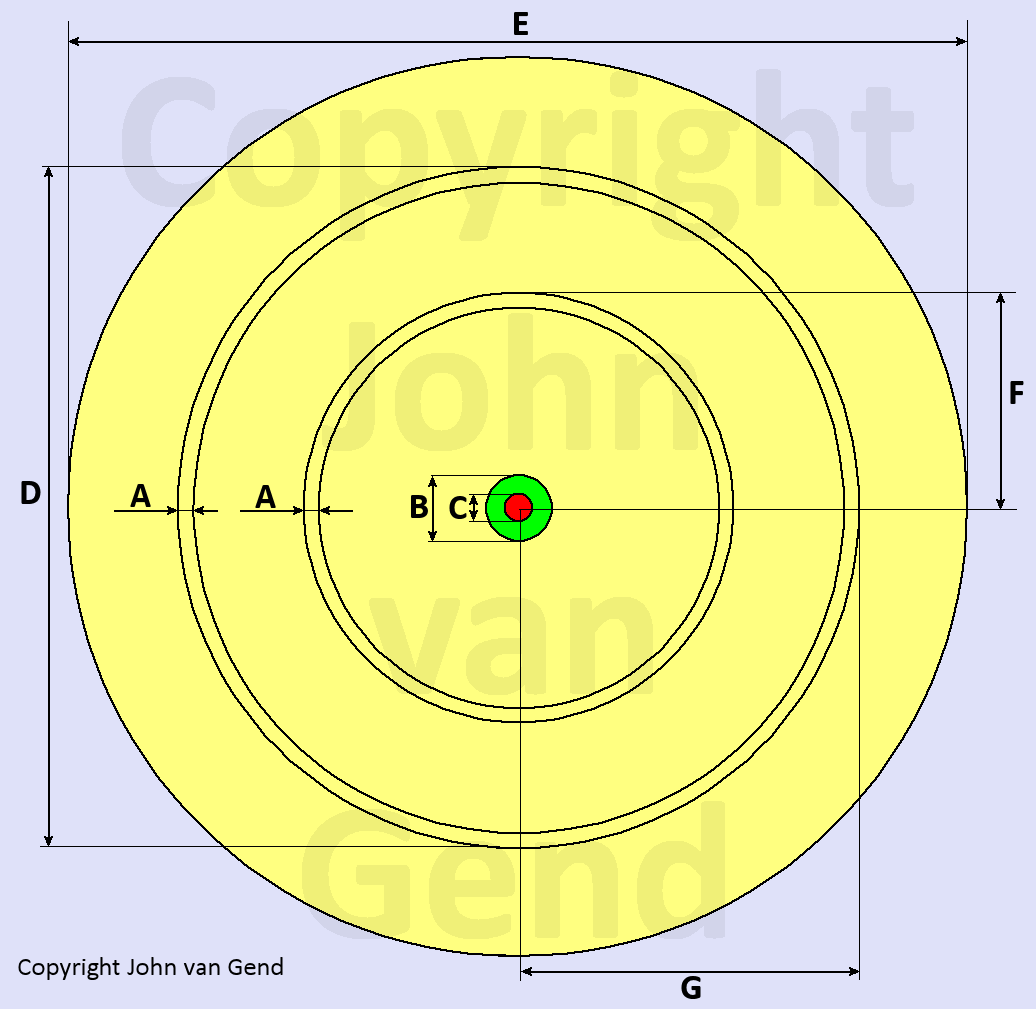

Use the following <code> fields_board </code> with details about circle parts and scores, and <code> radia </code> an array containing all relevant radia. 

In [2]:
### Scores on the board as dictionary
fields_board = {1: 6,2: 13, 3: 4,4: 18, 5: 1, 6: 20, 7: 5, 8:12,9:9,10:14,11:11,12:8,13:16,14:7,15:19,16:3,17:17,18:2,19:15,20:10 }

### boundary radia of interest (bull's eye, double scores, triple scores)
radia = [0, 6.5 , 16, 97, 107, 160,170] 


# double bull : 0-6.5mm
# single bull : 6.5-16mm

# triple ring: 97-107mm
# double ring: 160-170mm

# radius board: 277 mm


In [4]:
## Exercise

#### In order to determine the score of a throw polar coordinates are in place! 
#### From a position [x0,x1] we may calculate the polar coordinates (r,phi) such
#### [x0,x1]=[r*cos(phi), r*sin(phi)]
#### r = norm(x)
#### note x1/x0 = tan(phi); the inverse including right signs is calculated using np.arctan2
#### see the documentation how to use it!!

from numpy import pi


def angle(x0,x1):
    '''calculates phi in [0,2pi] such that x = r*(cos(phi),sin(phi))'''
    # input 2 vec x
    # output phi in [0,2pi]
    
    # YOUR CODE HERE
    ang=np.arctan2(x1,x0)
    return (ang>=0)*(ang)+(ang<0)*((2*pi)+ang)


def circle_part(x0,x1):
    '''Determine the relevant circle part'''
    # this can be used to find the value of a throw in the dictionary
    # input: Euclidean coordinates x
    # output: circle part
    #         first part: score 6
    #         second part: score 13
    #         ...
    #         twentieth part: score 10
    
    # YOUR CODE HERE
    
    return np.array(list(fields_board.values()))[np.floor((angle(x0,x1)+pi/20)/(pi/10)).astype(int)]

#Better score function 

def score(x0,x1):
    '''calculate the score for position x=[x0,x1]'''
    # input: Euclidean coordinates x
    # output: score according to dictionary
    #         use polar coordinates, and the functions angle, circle_part, read score from dictionary
    
    # YOUR CODE HERE
    # double bull : 0-6.5mm
    # single bull : 6.5-16mm

    # triple ring: 97-107mm
    # double ring: 160-170mm

    # radius board: 277 mm
    dist=np.sqrt(x0**2+x1**2)
    cp=circle_part(x0,x1)
    score= (dist<6.5)*50+(dist>6.5)*(dist<16)*25+(dist>16)*(dist<170)*cp+(dist>97)*(dist<107)*cp*2+(dist>160)*(dist<170)*cp

    return score


    

We now consider a dataset of throws, given in Euclidean coordinates, Bull's Eye serving as origin.
Your task is now to 

* Visualise the throws
* Write code to find the average score of these throws.

First load the data in the <code>CP1_data.csv</code> file

In [5]:
# load 'CP1_data.csv' with all coordinates of 100 throws using 'pd.read_csv'
# create two numpy arrays: 
#        x0_data first coordinates of throws
#        x1_data second coordinates of throws
#          

seed=1
# YOUR CODE HERE
import pandas as pd
dt= pd.read_csv("CP1_data.csv").to_numpy()
x0_data= dt[:,1]
x1_data= dt[:,2]

In [6]:
score(x0_data,x1_data)

array([ 1, 20, 36, 10,  0,  1,  0, 20, 24, 18, 40,  5, 20,  1,  9,  1,  5,
       10,  2,  1, 40,  0,  0,  1, 18, 20,  1, 18, 12, 12,  2,  8, 20, 10,
        5, 18, 18,  2, 12, 14,  0, 20, 40,  0,  4, 40,  2, 10, 12, 40, 40,
        4, 20,  0,  1, 20,  1, 18, 20,  1, 12,  0,  0, 10,  5,  1,  4, 40,
       18,  9, 20,  9, 28, 20,  8, 12,  0,  2,  5, 20,  5,  5, 20, 20,  5,
       18,  5, 20,  2,  1,  1, 18, 36,  0, 40, 12, 24, 12,  1,  2])

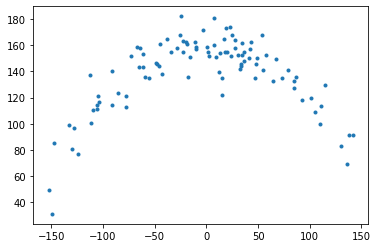

In [7]:
import matplotlib.pyplot as plt

# Create a plot with these points

# YOUR CODE HERE
plt.plot(x0_data,x1_data,".")


In [8]:
# Calculate the average score
# use your function score(x)
# YOUR CODE HERE


average_score= np.mean(score(x0_data,x1_data))

print('Average score is ', average_score)

Average score is  12.18
